In [5]:
#  BLOC 1 — Imports & config


# Données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# Utilitaires
import itertools

# ML classiques
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing

# Prétraitement
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Évaluation
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    f1_score,
    accuracy_score,
)
from sklearn import metrics

# Texte
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Équilibrage des classes
from imblearn.over_sampling import SMOTE

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
df = pd.read_csv('guinee_telecom_churn_FR.csv')
#print first 10 rows
df.head(100)

,id_client,region,sexe,age,revenu_estime_gnf,anciennete_mois,type_abonnement,forfait_international,messagerie_vocale,recharge_mensuelle_moy_gnf,...,minutes_jour,minutes_nuit,donnees_mo,nombre_sms,appels_service_client,pannes_signalees_30j,retard_paiement_jours,minutes_internationales,retour_client,resiliation
0,GN-100000,Labé,M,36,1237089,36,Prépayé,Non,Non,53900.0,...,134.96,0.00,471.1,28,0,2,2,2.6,"Rien à signaler, qualité au rendez-vous, merci...",1
1,GN-100001,Kankan,M,34,877449,15,Prépayé,Non,Non,94600.0,...,63.88,26.99,1291.0,26,1,1,1,5.4,"Prix raisonnable, réseau stable à Kipé et Nongo.",0
2,GN-100002,Conakry,M,59,2551993,6,Prépayé,Non,Non,167200.0,...,90.86,41.53,538.7,33,2,1,4,6.5,"Ça passe bien pour mes besoins, appels clairs ...",0
3,GN-100003,Faranah,M,29,781782,3,Prépayé,Non,Non,40400.0,...,98.49,11.81,287.9,39,2,2,1,3.7,"Service moyen, je recharge quand il faut, ça f...",1
4,GN-100004,N’Zérékoré,F,32,1029649,13,Prépayé,Non,Non,121900.0,...,72.50,21.32,1119.5,25,0,4,7,11.3,"Ça passe bien pour mes besoins, appels clairs ...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,GN-100095,Boké,F,34,1914330,25,Prépayé,Non,Non,45500.0,...,61.70,73.71,2735.0,28,2,1,0,0.2,"Rien à signaler, qualité au rendez-vous, merci...",0
96,GN-100096,Kankan,F,24,1280438,12,Prépayé,Non,Non,169800.0,...,57.21,58.57,316.2,43,0,0,3,4.1,"Ça passe bien pour mes besoins, appels clairs ...",0
97,GN-100097,Conakry,M,34,2104776,6,Prépayé,Oui,Non,120500.0,...,69.68,66.96,305.9,35,0,0,0,6.3,"Support réactif, j’ai eu de l’aide rapidement,...",0
98,GN-100098,Conakry,M,30,2566809,8,Prépayé,Non,Oui,370300.0,...,56.39,81.75,683.0,27,2,0,2,9.7,"Bon service, forfait data intéressant, je suis...",0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_client                   2000 non-null   object 
 1   region                      2000 non-null   object 
 2   sexe                        2000 non-null   object 
 3   age                         2000 non-null   int64  
 4   revenu_estime_gnf           2000 non-null   int64  
 5   anciennete_mois             2000 non-null   int64  
 6   type_abonnement             2000 non-null   object 
 7   forfait_international       2000 non-null   object 
 8   messagerie_vocale           2000 non-null   object 
 9   recharge_mensuelle_moy_gnf  2000 non-null   float64
 10  moyen_paiement              2000 non-null   object 
 11  minutes_jour                2000 non-null   float64
 12  minutes_nuit                2000 non-null   float64
 13  donnees_mo                  2000 

In [8]:
df.describe()

,age,revenu_estime_gnf,anciennete_mois,recharge_mensuelle_moy_gnf,minutes_jour,minutes_nuit,donnees_mo,nombre_sms,appels_service_client,pannes_signalees_30j,retard_paiement_jours,minutes_internationales,resiliation
count,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,31.828500,1.422569e+06,25.709000,208814.450000,60.740735,46.274395,856.868800,34.870500,1.825000,0.885500,3.269000,5.26105,0.248500
std,9.612351,5.914129e+05,23.606566,135736.842904,33.652262,28.132665,680.447061,5.980603,1.364297,0.937992,3.447982,5.29809,0.432251
min,16.000000,3.000000e+05,1.000000,15400.000000,0.000000,0.000000,47.100000,17.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,25.000000,9.938270e+05,9.000000,102975.000000,36.187500,25.752500,429.300000,31.000000,1.000000,0.000000,0.000000,1.50000,0.000000
50%,32.000000,1.352978e+06,18.000000,178300.000000,60.095000,45.420000,664.950000,35.000000,2.000000,1.000000,2.000000,3.70000,0.000000
75%,38.000000,1.792034e+06,35.000000,291250.000000,83.765000,65.117500,1044.800000,39.000000,3.000000,1.000000,6.000000,7.20000,0.000000
max,70.000000,3.758718e+06,144.000000,827600.000000,186.080000,143.630000,6491.500000,59.000000,8.000000,5.000000,20.000000,37.80000,1.000000


In [9]:
df.describe(include=['O'])

,id_client,region,sexe,type_abonnement,forfait_international,messagerie_vocale,moyen_paiement,retour_client
count,2000,2000,2000,2000,2000,2000,2000,2000
unique,2000,8,2,2,2,2,4,16
top,GN-101983,Conakry,M,Prépayé,Non,Non,Orange Money,"Rien à signaler, qualité au rendez-vous, merci..."
freq,1,766,1028,1602,1686,1370,1322,298


In [10]:
# BLOC 2 — Encodage des variables catégorielles

# Création d’un encodeur
label_encoder = preprocessing.LabelEncoder()

# Encodage des colonnes catégorielles de base
df['region'] = label_encoder.fit_transform(df['region'])
df['sexe'] = label_encoder.fit_transform(df['sexe'])
df['type_abonnement'] = label_encoder.fit_transform(df['type_abonnement'])
df['forfait_international'] = label_encoder.fit_transform(df['forfait_international'])
df['messagerie_vocale'] = label_encoder.fit_transform(df['messagerie_vocale'])
df['moyen_paiement'] = label_encoder.fit_transform(df['moyen_paiement'])

# Encodage de la colonne cible (resiliation)
df['resiliation'] = label_encoder.fit_transform(df['resiliation'])

# On NE supprime pas de colonnes ici, car toutes sont utiles
# (mon dataset ne contient pas "phone number" ou "state")

print(" Colonnes catégorielles encodées avec succès !")
df.head()

 Colonnes catégorielles encodées avec succès !


,id_client,region,sexe,age,revenu_estime_gnf,anciennete_mois,type_abonnement,forfait_international,messagerie_vocale,recharge_mensuelle_moy_gnf,...,minutes_jour,minutes_nuit,donnees_mo,nombre_sms,appels_service_client,pannes_signalees_30j,retard_paiement_jours,minutes_internationales,retour_client,resiliation
0,GN-100000,5,1,36,1237089,36,1,0,0,53900.0,...,134.96,0.00,471.1,28,0,2,2,2.6,"Rien à signaler, qualité au rendez-vous, merci...",1
1,GN-100001,3,1,34,877449,15,1,0,0,94600.0,...,63.88,26.99,1291.0,26,1,1,1,5.4,"Prix raisonnable, réseau stable à Kipé et Nongo.",0
2,GN-100002,1,1,59,2551993,6,1,0,0,167200.0,...,90.86,41.53,538.7,33,2,1,4,6.5,"Ça passe bien pour mes besoins, appels clairs ...",0
3,GN-100003,2,1,29,781782,3,1,0,0,40400.0,...,98.49,11.81,287.9,39,2,2,1,3.7,"Service moyen, je recharge quand il faut, ça f...",1
4,GN-100004,7,0,32,1029649,13,1,0,0,121900.0,...,72.50,21.32,1119.5,25,0,4,7,11.3,"Ça passe bien pour mes besoins, appels clairs ...",0


👥 Nombre de clients restés : 1503
📤 Nombre de clients résiliés : 497


/tmp/ipython-input-3191133340.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='resiliation', palette='coolwarm')


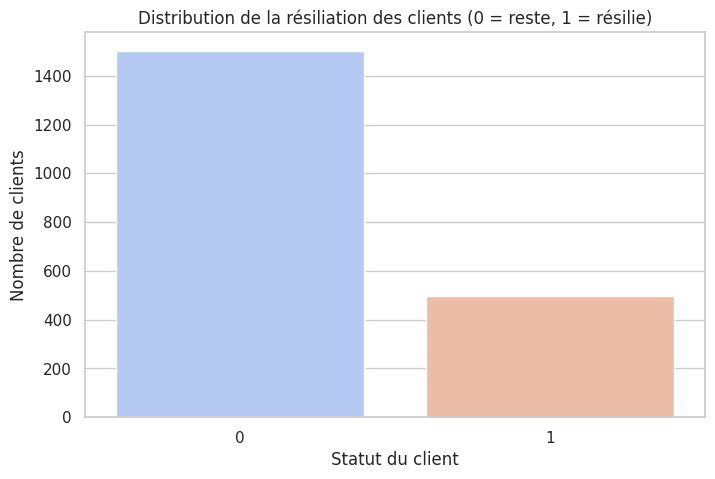

In [11]:
# BLOC 3 — Comptage des clients restés / résiliés

# Comptage
reste = df[df['resiliation'] == 0].shape[0]
resilie = df[df['resiliation'] == 1].shape[0]

# Affichage
print(f"👥 Nombre de clients restés : {reste}")
print(f"📤 Nombre de clients résiliés : {resilie}")

# Visualisation simple
sns.countplot(data=df, x='resiliation', palette='coolwarm')
plt.title("Distribution de la résiliation des clients (0 = reste, 1 = résilie)")
plt.xlabel("Statut du client")
plt.ylabel("Nombre de clients")
plt.show()

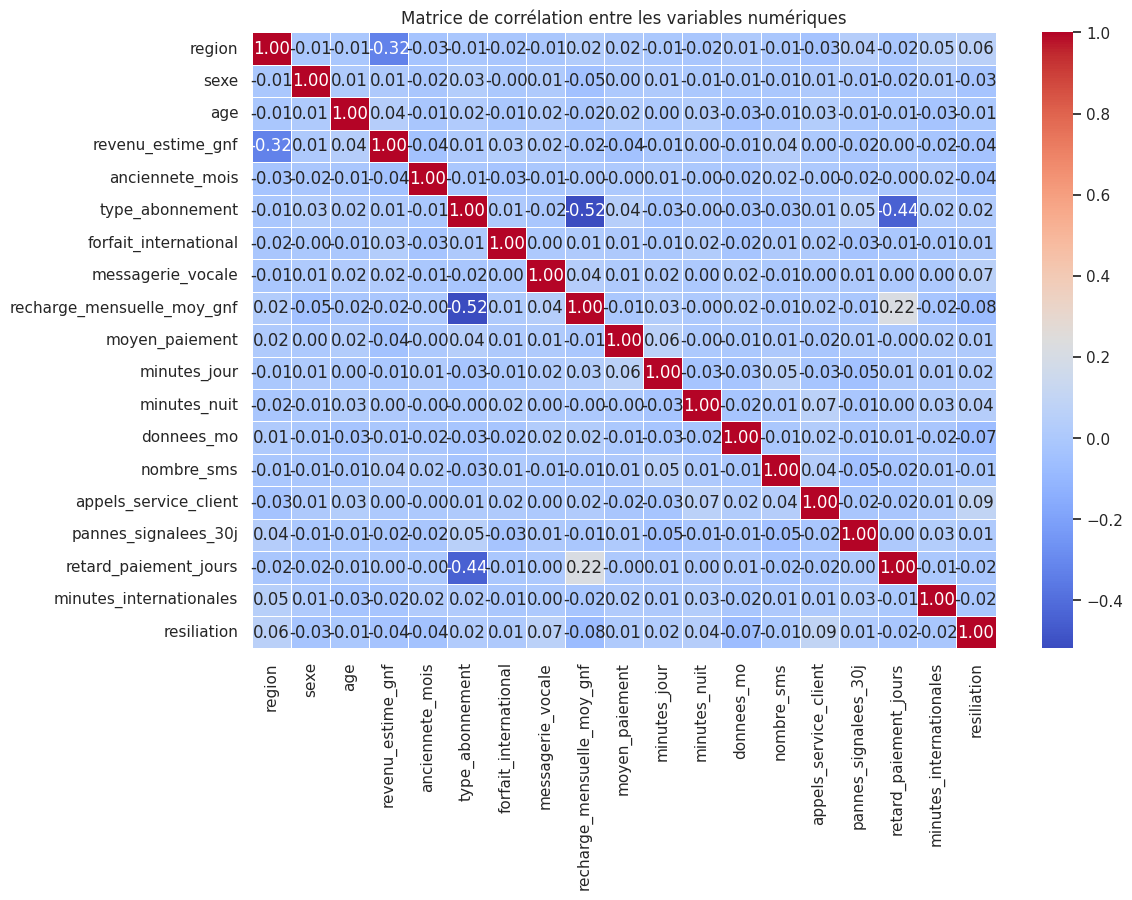

In [12]:
# BLOC 4 — Matrice de corrélation

# Calcul de la matrice de corrélation (valeurs numériques uniquement)
corr = df.corr(numeric_only=True, method='pearson')

# Taille et style du graphique
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,            # affiche les valeurs dans les cases
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    xticklabels=corr.columns,
    yticklabels=corr.columns
)

plt.title("Matrice de corrélation entre les variables numériques")
plt.show()

In [13]:
#  BLOC 5 — Normalisation des données numériques

from sklearn.preprocessing import StandardScaler

# On sépare les variables explicatives (X) et la cible (y)
#  On exclut 'id_client' et 'retour_client' car non numériques
features = [
    'region', 'sexe', 'age', 'revenu_estime_gnf', 'anciennete_mois',
    'type_abonnement', 'forfait_international', 'messagerie_vocale',
    'recharge_mensuelle_moy_gnf', 'moyen_paiement', 'minutes_jour',
    'minutes_nuit', 'minutes_internationales', 'donnees_mo',
    'nombre_sms', 'appels_service_client', 'pannes_signalees_30j',
    'retard_paiement_jours'
]

# Matrices X et y
X = df[features].values
y = df['resiliation'].values

# Normalisation (centrage-réduction)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Création d’un DataFrame normalisé
dfNorm = pd.DataFrame(X_std, columns=features, index=df.index)

# Ajout de la colonne cible (resiliation)
dfNorm['resiliation'] = y

print("✅ Données normalisées avec succès :")
dfNorm.head(10)


✅ Données normalisées avec succès :


,region,sexe,age,revenu_estime_gnf,anciennete_mois,type_abonnement,forfait_international,messagerie_vocale,recharge_mensuelle_moy_gnf,moyen_paiement,minutes_jour,minutes_nuit,minutes_internationales,donnees_mo,nombre_sms,appels_service_client,pannes_signalees_30j,retard_paiement_jours,resiliation
0,1.048847,0.972381,0.434081,-0.313700,0.436047,0.498437,-0.431555,-0.678125,-1.141571,0.645841,2.206028,-1.645275,-0.502391,-0.567076,-1.149084,-1.338020,1.188473,-0.368133,1
1,0.138192,0.972381,0.225964,-0.921955,-0.453758,0.498437,-0.431555,-0.678125,-0.841651,0.645841,0.093309,-0.685652,0.026233,0.638168,-1.483583,-0.604858,0.122100,-0.658231,0
2,-0.772463,0.972381,2.827435,1.910183,-0.835104,0.498437,-0.431555,-0.678125,-0.306659,0.645841,0.895238,-0.168686,0.233907,-0.467705,-0.312839,0.128303,0.122100,0.212061,0
3,-0.317136,0.972381,-0.294330,-1.083755,-0.962219,0.498437,-0.431555,-0.678125,-1.241053,0.645841,1.122026,-1.225373,-0.294718,-0.836378,0.690655,0.128303,1.188473,-0.658231,1
4,1.959502,-1.028403,0.017846,-0.664541,-0.538502,0.498437,-0.431555,-0.678125,-0.640476,0.645841,0.349522,-0.887247,1.140120,0.386065,-1.650832,-1.338020,3.321220,1.082353,0
5,-0.317136,-1.028403,-0.294330,-0.932422,-0.369015,0.498437,2.317202,-0.678125,-1.193154,0.645841,-1.082241,-1.442613,-0.936619,6.416109,0.523406,-0.604858,-0.944274,-0.948328,1
6,0.138192,-1.028403,0.850317,-1.125557,0.351304,0.498437,-0.431555,-0.678125,-0.435617,0.645841,2.540413,0.464189,-0.049285,-0.444038,-0.814586,0.128303,1.188473,-0.948328,0
7,1.959502,0.972381,-0.918683,-0.408647,0.902136,-2.006272,-0.431555,-0.678125,2.750756,-1.230240,0.062099,-0.489390,0.063992,0.522480,-0.814586,0.128303,0.122100,2.242742,0
8,-0.772463,0.972381,0.225964,-0.899704,0.266560,0.498437,-0.431555,-0.678125,-0.389192,0.645841,1.018887,0.117174,-0.653427,-0.617791,1.192402,3.060950,1.188473,-0.948328,0
9,-0.772463,0.972381,-0.918683,-0.162047,-0.750360,0.498437,-0.431555,1.474654,-1.116516,0.645841,0.980247,0.394857,1.102361,0.478821,-1.483583,-0.604858,0.122100,1.662547,0


In [14]:
# BLOC 6 — Séparation des données : Entraînement vs Test

from sklearn.model_selection import train_test_split

# Variables explicatives (X) et cible (y)
X = dfNorm.drop(columns=['resiliation'])  # toutes les colonnes sauf la cible
y = dfNorm['resiliation']                 # la colonne cible (0 = reste, 1 = résilie)

# Division du dataset
# 70% pour l'entraînement (train), 30% pour le test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,        # proportion des données pour le test
    random_state=0,       # pour avoir les mêmes résultats à chaque exécution
    stratify=y            # pour garder le même équilibre 0/1 dans les deux ensembles
)

# Dimensions des ensembles
print(f" Données divisées avec succès :")
print(f"   - X_train : {X_train.shape}")
print(f"   - X_test  : {X_test.shape}")
print(f"   - y_train : {y_train.shape}")
print(f"   - y_test  : {y_test.shape}")


 Données divisées avec succès :
   - X_train : (1400, 18)
   - X_test  : (600, 18)
   - y_train : (1400,)
   - y_test  : (600,)


In [15]:
# BLOC 7 — Équilibrage des classes avec SMOTE

from imblearn.over_sampling import SMOTE
import collections

# Vérifions d'abord la répartition initiale
print("Répartition avant SMOTE :")
print(collections.Counter(y_train))

# Application du sur-échantillonnage
sm = SMOTE(random_state=0, sampling_strategy=1.0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Vérifions la nouvelle répartition
print("\nRépartition après SMOTE :")
print(collections.Counter(y_train_res))


Répartition avant SMOTE :
Counter({0: 1052, 1: 348})

Répartition après SMOTE :
Counter({0: 1052, 1: 1052})


In [16]:
# BLOC 8  — Fonction d'évaluation commune des modèles

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt

def eval_model(model, X_test, y_test, model_name=None, plot_cm=True):
    """
    Évalue un modèle de classification binaire (churn / non churn).

    - Calcule : accuracy, precision, recall, F1, AUC (si possible)
    - Affiche : matrice de confusion + classification report
    - Retourne : un dictionnaire de métriques pour comparaison globale
    """
    if model_name is None:
        model_name = model.__class__.__name__

    # Prédictions
    y_pred = model.predict(X_test)

    # Probabilités pour AUC si le modèle les fournit
    try:
        y_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
    except Exception:
        y_proba = None
        auc = None

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)

    if plot_cm:
        plt.figure(figsize=(4, 3))
        sns.heatmap(
            cm,
            annot=True,
            fmt='d',
            xticklabels=['Non churn', 'Churn'],
            yticklabels=['Non churn', 'Churn']
        )
        plt.xlabel('Classe prédite')
        plt.ylabel('Classe réelle')
        plt.title(f'Matrice de confusion — {model_name}')
        plt.tight_layout()
        plt.show()

    print(f"\n===== {model_name} =====")
    print(classification_report(y_test, y_pred, target_names=['Non churn', 'Churn']))
    if auc is not None:
        print(f"AUC-ROC : {auc:.3f}")

    # Dictionnaire de métriques pour tableau comparatif
    metrics_dict = {
        "modèle": model_name,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "auc": auc
    }

    return metrics_dict

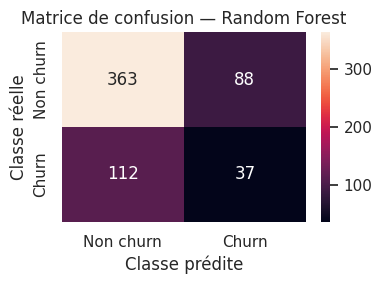


===== Random Forest =====
              precision    recall  f1-score   support

   Non churn       0.76      0.80      0.78       451
       Churn       0.30      0.25      0.27       149

    accuracy                           0.67       600
   macro avg       0.53      0.53      0.53       600
weighted avg       0.65      0.67      0.66       600

AUC-ROC : 0.561


In [17]:
#  BLOC 9 — Modèle ML 1 : Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300,        # tu peux garder 300
    max_depth=8,             # limite la profondeur des arbres
    min_samples_split=20,    # au moins 20 échantillons pour couper un nœud
    min_samples_leaf=10,     # au moins 10 échantillons par feuille
    max_features="sqrt",     # moins de variables par arbre -> plus de généralisation
    random_state=42,
    n_jobs=-1
)

# Entraînement sur données équilibrées (SMOTE)
rf_model.fit(X_train_res, y_train_res)

# Évaluation du modèle
rf_metrics = eval_model(rf_model, X_test, y_test, model_name="Random Forest")


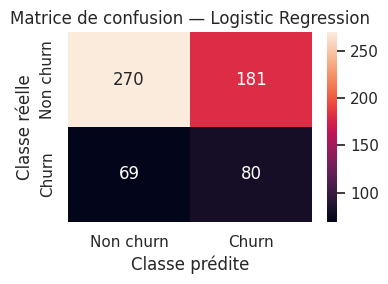


===== Logistic Regression =====
              precision    recall  f1-score   support

   Non churn       0.80      0.60      0.68       451
       Churn       0.31      0.54      0.39       149

    accuracy                           0.58       600
   macro avg       0.55      0.57      0.54       600
weighted avg       0.67      0.58      0.61       600

AUC-ROC : 0.596


In [18]:
#  BLOC 10 — Modèle ML 2 : Régression Logistique

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(
    max_iter=2000,
    solver='lbfgs'
)

log_model.fit(X_train_res, y_train_res)

log_metrics = eval_model(log_model, X_test, y_test, model_name="Logistic Regression")

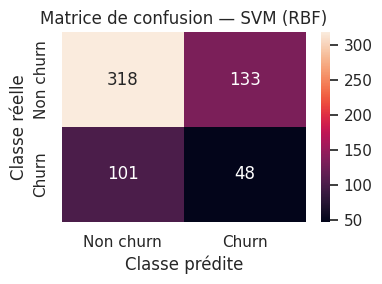


===== SVM (RBF) =====
              precision    recall  f1-score   support

   Non churn       0.76      0.71      0.73       451
       Churn       0.27      0.32      0.29       149

    accuracy                           0.61       600
   macro avg       0.51      0.51      0.51       600
weighted avg       0.64      0.61      0.62       600

AUC-ROC : 0.522


In [19]:
# BLOC 11 — Modèle ML 3 : SVM (SVC)

from sklearn.svm import SVC

svm_model = SVC(
    kernel='rbf',
    C=1.0,            # tu peux tester 0.5, 1, 2
    gamma='scale',    # déjà le défaut actuel normalement
    probability=True,
    random_state=42
)

svm_model.fit(X_train_res, y_train_res)

svm_metrics = eval_model(svm_model, X_test, y_test, model_name="SVM (RBF)")


In [20]:
pip install xgboost

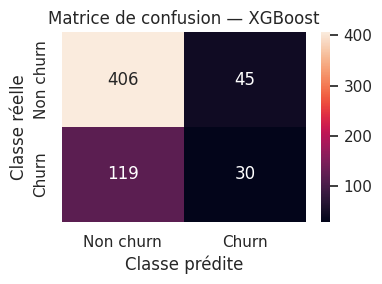


===== XGBoost =====
              precision    recall  f1-score   support

   Non churn       0.77      0.90      0.83       451
       Churn       0.40      0.20      0.27       149

    accuracy                           0.73       600
   macro avg       0.59      0.55      0.55       600
weighted avg       0.68      0.73      0.69       600

AUC-ROC : 0.572


In [21]:
# BLOC 12 — Modèle ML 4 : XGBoost

from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,         # moins profond
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,      # L2 regularisation
    reg_alpha=0.1,       # L1 regularisation
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(X_train_res, y_train_res)

xgb_metrics = eval_model(xgb_model, X_test, y_test, model_name="XGBoost")


In [22]:
# BLOC 13 — Comparaison des modèles ML

import pandas as pd

ml_results = pd.DataFrame([
    rf_metrics,
    log_metrics,
    svm_metrics,
    xgb_metrics
])

ml_results.set_index("modèle", inplace=True)
ml_results


,accuracy,precision,recall,f1,auc
modèle,,,,,
Random Forest,0.666667,0.296000,0.248322,0.270073,0.561229
Logistic Regression,0.583333,0.306513,0.536913,0.390244,0.596021
SVM (RBF),0.610000,0.265193,0.322148,0.290909,0.521593
XGBoost,0.726667,0.400000,0.201342,0.267857,0.571898


In [23]:
# BLOC 14 — Tableau des accuracies train / test

models = {
    "RandomForestClassifier": rf_model,
    "LogisticRegression": log_model,
    "SVC": svm_model,
    "XGBClassifier": xgb_model
}

rows = []

for name, model in models.items():
    acc_train = model.score(X_train_res, y_train_res) * 100   # en %
    acc_test  = model.score(X_test, y_test) * 100             # en %

    rows.append({
        "Algo": name,
        "acc_train": acc_train,
        "acc_test": acc_test
    })

df_results = pd.DataFrame(rows)
df_results.set_index("Algo", inplace=True)
df_results


,acc_train,acc_test
Algo,,
RandomForestClassifier,90.922053,66.666667
LogisticRegression,61.644487,58.333333
SVC,86.739544,61.000000
XGBClassifier,90.969582,72.666667


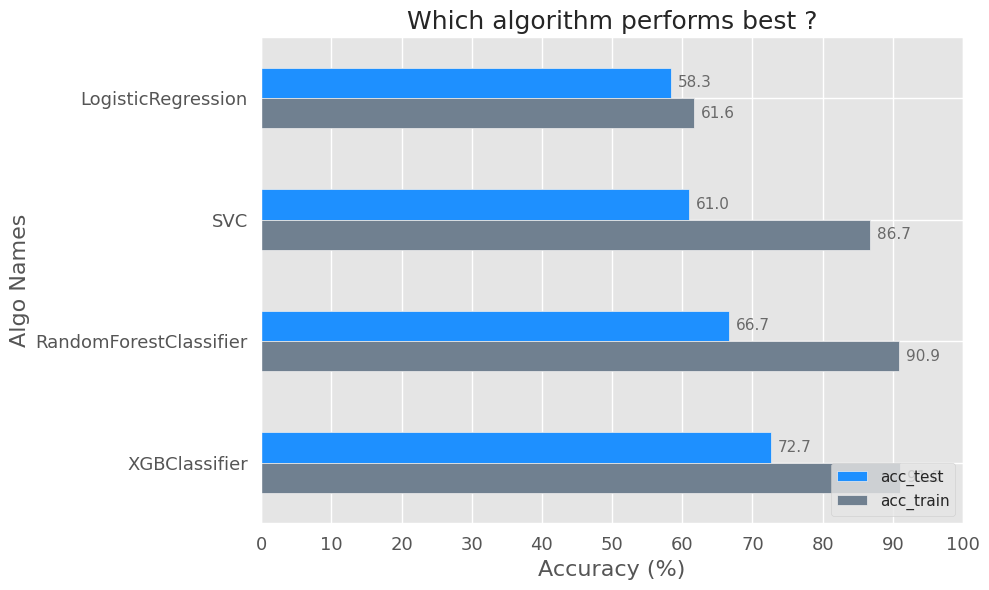

In [24]:
# BLOC 15 — Graphique comparatif des algorithmes

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# on s'assure que l'ordre est du moins bon au meilleur sur test
df_plot = df_results.sort_values('acc_test', ascending=True)

ax = df_plot[['acc_test', 'acc_train']].plot(
    kind='barh',
    figsize=(10, 6),
    color=['dodgerblue', 'slategray'],
    fontsize=13
)

ax.set_alpha(0.9)
ax.set_title("Which algorithm performs best ?", fontsize=18)
ax.set_xlabel("Accuracy (%)", fontsize=16)
ax.set_ylabel("Algo Names", fontsize=16)

# graduations de 0 à 100 %
ax.set_xlim(0, 100)
ax.set_xticks(range(0, 101, 10))

# labels des barres (valeurs à droite des barres)
for bars in ax.containers:
    for bar in bars:
        width = bar.get_width()
        ax.text(
            width + 1,                            # position x du texte
            bar.get_y() + bar.get_height() / 2,   # position y (centre)
            f"{width:.1f}",                       # texte (ex: 93.5)
            va='center',
            fontsize=11,
            color='dimgrey'
        )

ax.legend(['acc_test', 'acc_train'], loc='lower right')
ax.invert_yaxis()   # meilleur en haut

plt.tight_layout()
plt.show()


In [25]:
# BLOC 16 — Deep Learning : MLP (Keras)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Architecture MLP simple pour le churn
dl_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_res.shape[1],)),
    Dropout(0.2),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(16, activation='relu'),

    Dense(1, activation='sigmoid')  # sortie binaire (proba de churn)
])

dl_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = dl_model.fit(
    X_train_res,
    y_train_res,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=1
)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5764 - loss: 0.6773 - val_accuracy: 0.0095 - val_loss: 0.9309
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6417 - loss: 0.6425 - val_accuracy: 0.0071 - val_loss: 0.9167
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6464 - loss: 0.6357 - val_accuracy: 0.0214 - val_loss: 0.8931
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6162 - loss: 0.6487 - val_accuracy: 0.0523 - val_loss: 0.9205
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6328 - loss: 0.6349 - val_accuracy: 0.0950 - val_loss: 0.9242
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6343 - loss: 0.6285 - val_accuracy: 0.1283 - val_loss: 0.8894
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6475 - loss: 0.6158 - val_accuracy: 0.1663 - val_loss: 0.8865
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6714 - loss: 0.6005 - val_accuracy: 0.2352 - val_loss: 0.8594
E

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


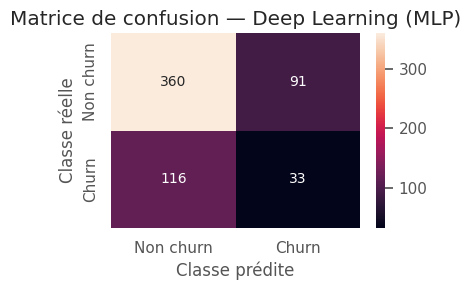


===== Deep Learning (MLP) =====
              precision    recall  f1-score   support

   Non churn       0.76      0.80      0.78       451
       Churn       0.27      0.22      0.24       149

    accuracy                           0.66       600
   macro avg       0.51      0.51      0.51       600
weighted avg       0.63      0.66      0.64       600

AUC-ROC : 0.547


In [26]:
#  BLOC 17 — Évaluation du modèle Deep Learning (MLP)

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def eval_dl_model(dl_model, X_test, y_test, model_name="Deep Learning (MLP)"):
    """
    Évalue le réseau de neurones sur le churn.
    On aligne les métriques avec celles des modèles ML.
    """
    # Probabilités prédites (sortie du sigmoïde)
    y_proba = dl_model.predict(X_test).ravel()

    # Classe binaire : 1 si proba >= 0.5, 0 sinon
    y_pred = (y_proba >= 0.5).astype(int)

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(4, 3))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        xticklabels=['Non churn', 'Churn'],
        yticklabels=['Non churn', 'Churn']
    )
    plt.xlabel('Classe prédite')
    plt.ylabel('Classe réelle')
    plt.title(f'Matrice de confusion — {model_name}')
    plt.tight_layout()
    plt.show()

    print(f"\n===== {model_name} =====")
    print(classification_report(y_test, y_pred, target_names=['Non churn', 'Churn']))

    auc = roc_auc_score(y_test, y_proba)

    print(f"AUC-ROC : {auc:.3f}")

    dl_metrics = {
        "modèle": model_name,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "auc": auc
    }

    return dl_metrics

dl_metrics = eval_dl_model(dl_model, X_test, y_test)


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


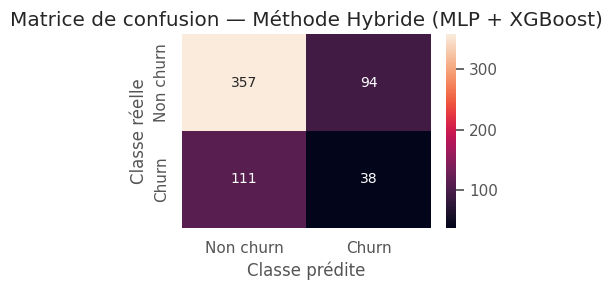


===== Méthode Hybride (MLP + XGBoost) =====
              precision    recall  f1-score   support

   Non churn       0.76      0.79      0.78       451
       Churn       0.29      0.26      0.27       149

    accuracy                           0.66       600
   macro avg       0.53      0.52      0.52       600
weighted avg       0.64      0.66      0.65       600

AUC-ROC : 0.541


In [27]:
# BLOC 18 — Méthode Hybride : ML + DL

# 1) Probabilités du modèle DL sur le train et le test
dl_train_proba = dl_model.predict(X_train_res).ravel()
dl_test_proba  = dl_model.predict(X_test).ravel()

# 2) Construction des nouveaux jeux de données hybrides
#    (features classiques + proba DL comme feature supplémentaire)
X_train_hybrid = np.column_stack([X_train_res, dl_train_proba])
X_test_hybrid  = np.column_stack([X_test, dl_test_proba])

# 3) Modèle ML sur ces features enrichies
from xgboost import XGBClassifier

hybrid_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

hybrid_model.fit(X_train_hybrid, y_train_res)

# 4) Évaluation avec la même fonction que pour les modèles ML
hybrid_metrics = eval_model(
    hybrid_model,
    X_test_hybrid,
    y_test,
    model_name="Méthode Hybride (MLP + XGBoost)"
)


In [28]:
# BLOC 19 — Comparaison globale : ML vs DL vs Hybride

all_results = pd.DataFrame([
    rf_metrics,
    log_metrics,
    svm_metrics,
    xgb_metrics,
    dl_metrics,
    hybrid_metrics
])

all_results.set_index("modèle", inplace=True)
all_results


,accuracy,precision,recall,f1,auc
modèle,,,,,
Random Forest,0.666667,0.296000,0.248322,0.270073,0.561229
Logistic Regression,0.583333,0.306513,0.536913,0.390244,0.596021
SVM (RBF),0.610000,0.265193,0.322148,0.290909,0.521593
XGBoost,0.726667,0.400000,0.201342,0.267857,0.571898
Deep Learning (MLP),0.655000,0.266129,0.221477,0.241758,0.547151
Méthode Hybride (MLP + XGBoost),0.658333,0.287879,0.255034,0.270463,0.541496


Meilleur modèle pour l'importance des variables : XGBoost


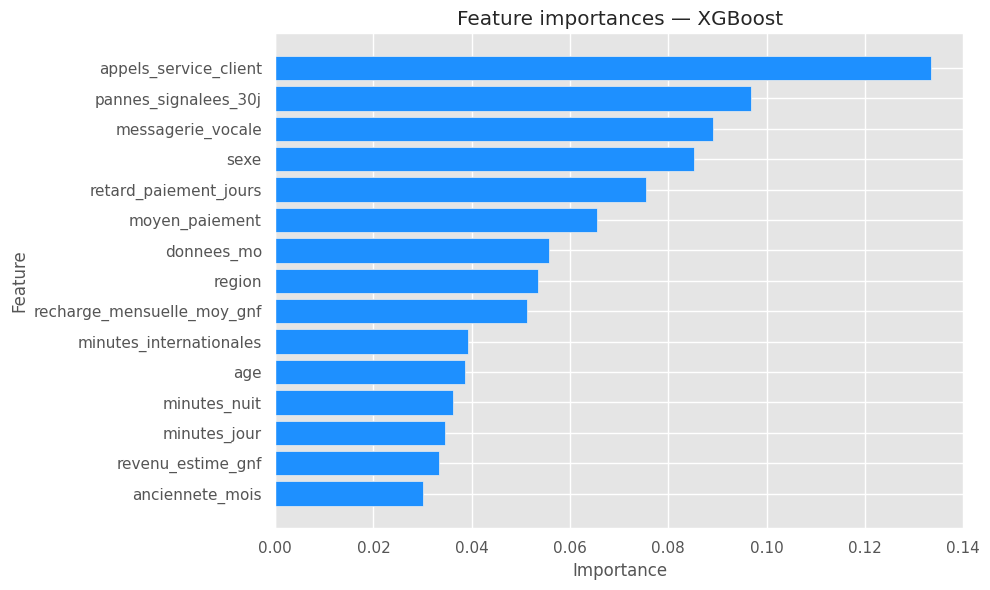

In [29]:
# BLOC 20 — Importance des variables (meilleur modèle ML)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. On définit les modèles "arbres" qui ont feature_importances_
tree_models = {
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

# 2. On récupère les résultats uniquement pour ces modèles
tree_results = ml_results.loc[["Random Forest", "XGBoost"]]

# 3. On choisit le meilleur sur le jeu de test (accuracy la plus élevée)
best_tree_name = tree_results["accuracy"].idxmax()
best_tree_model = tree_models[best_tree_name]

print(f"Meilleur modèle pour l'importance des variables : {best_tree_name}")

# 4. Importance des features
importances = best_tree_model.feature_importances_

# Si tes features viennent de X = df.drop('churn', axis=1)
feature_names = X.columns

feat_importances = pd.Series(importances, index=feature_names)

# On prend les N features les plus importantes (ex. 15)
feat_importances = feat_importances.sort_values(ascending=True).tail(15)

# 5. Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_importances.index, feat_importances.values, color='dodgerblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title(f"Feature importances — {best_tree_name}")
plt.tight_layout()
plt.show()


In [34]:
import pickle

# 1) on s'assure que le dossier existe
# os.makedirs("../model", exist_ok=True)

# 2) on sauvegarde le meilleur modèle (XGBoost)
with open("model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)